# Simple 10-class classification
By: Mijael Martinez

In [1]:
# Suppress warkings (gets rid of some type-conversion warnings)
import warnings
warnings.filterwarnings("ignore")

import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np
import matplotlib.pyplot as plt


%matplotlib inline

Using TensorFlow backend.


### Generate some dummy data

In [2]:
classes = 10
data = np.zeros((1000, 100))
labels = np.zeros((1000, 1), dtype=int)

poles = np.round(np.concatenate(
    (np.random.uniform(0,classes,(classes,2)),
    np.random.uniform(-5,5,(classes,4))),axis=1))

#Using the poles, generate 100 images for each of them.
points = 5000
fig=plt.figure(figsize=(15, 7))
for i in range(0, len(poles)):
    p = poles[i,0:2]
    for j in range(0,100):
        sigma = poles[i, 2:6].reshape(2,2) + np.random.uniform(-0.5,0.5,(2,2))
        x,y = np.random.multivariate_normal(p,sigma,points).T
        H = np.histogram2d(x,y,bins=classes, range=[[0,classes],[0,classes]], normed=True)[0].T
        data[i*100+j] = H.reshape(1,100)
        labels[i*100+j] = i

In [3]:
poles

array([[ 1.,  5.,  4.,  5., -1.,  0.],
       [ 3.,  9.,  4.,  3.,  1., -2.],
       [ 9.,  7., -1.,  4.,  2., -1.],
       [ 8.,  3.,  1.,  3.,  4.,  3.],
       [ 5.,  6.,  4.,  5., -3., -4.],
       [ 2., 10.,  3., -1.,  1.,  0.],
       [ 4.,  2., -1.,  5., -2.,  3.],
       [ 0.,  3.,  2.,  1.,  4., -4.],
       [ 4.,  8.,  1., -4., -2., -5.],
       [ 9.,  1.,  1., -4., -2., -3.]])

### (Optional) Visualization of the data
This is not part of the Keras example, but it helps to understand what we are trying to do.

In [4]:
# Plot a 2D representation of the data, using t-SNE
from sklearn.manifold import TSNE
data_viz = TSNE(n_components=2).fit_transform(data)
print("Data dimensions after reduction: {}".format(data_viz.shape))

Data dimensions after reduction: (1000, 2)


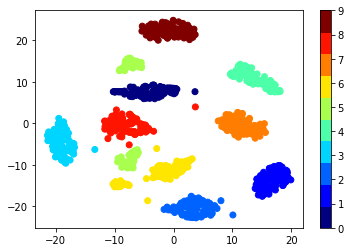

In [5]:
plt.scatter(data_viz[:,0], data_viz[:,1], c=labels[:,0], cmap=plt.cm.get_cmap("jet", classes))
plt.colorbar(ticks=range(classes))

#### Let's see what each example looks like
We can think of them as the images of "digits." We will actually train character recognition in future tutorials.

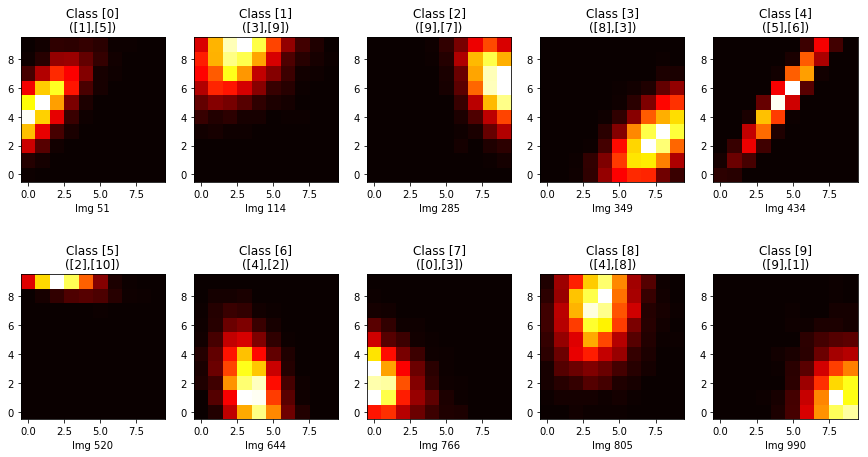

In [6]:
sampleSize = 10
samples = np.array(range(0,1000,100)) + np.random.randint(0,100,(1,classes))
samples = samples[0,:].tolist()

fig=plt.figure(figsize=(15, 8))
for i in range(0, sampleSize):
    fig.add_subplot(2, 5, i+1, aspect='equal')
    plt.imshow(np.reshape(data[samples[i],:], (10,10)), interpolation='nearest', cmap="hot", origin='low')
    plt.title('Class {}\n({},{})'.format(labels[samples[i]], 
                                        poles[labels[samples[i]], 0].astype(int), 
                                        poles[labels[samples[i]], 1].astype(int)))
    plt.xlabel("Img {}".format(samples[i]))

## Finally, let's use Keras

### Create the model

In [7]:
# For a single-input model with 10 classes (categorical classification):
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=100))
model.add(Dense(classes, activation='softmax'))

### Compile the model

In [ ]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Transform labels (i.e., the outputs), to the shape expected by the model

In [9]:
# Convert labels to categorical one-hot encoding
one_hot_labels = keras.utils.to_categorical(labels, num_classes=classes)

# Optional: visualize the label transformation
rIdx = np.random.randint(0, labels.shape[0])
print("Label shapes before: {}".format(labels.shape))
print("\tLabel at random index {}:\n\t{}\n".format(rIdx, labels[rIdx]))

print("Label shapes after: {}".format(one_hot_labels.shape))
print("\tOne-hot encoded label at random index {} (same as above):\n\t{}\n".format(rIdx, one_hot_labels[rIdx, :]))
print("(Pos.)\t{}".format(np.array(range(0,10),dtype="float")))

Label shapes before: (1000, 1)
	Label at random index 479:
	[4]

Label shapes after: (1000, 10)
	One-hot encoded label at random index 479 (same as above):
	[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]

(Pos.)	[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]


### Train the model
Note how the loss decreases, while the accuracy increases, as the training goes through more and more epochs.

In [10]:
# Train the model, iterating on the data in batches of 32 samples
model.fit(data, one_hot_labels, epochs=100, batch_size=32, shuffle=True, verbose=1)

Epoch 1/100
1000/1000 [==============================] - 0s 249us/step - loss: 2.2385 - acc: 0.7180
Epoch 2/100
1000/1000 [==============================] - 0s 64us/step - loss: 2.1307 - acc: 0.9870
Epoch 3/100
1000/1000 [==============================] - 0s 63us/step - loss: 2.0082 - acc: 1.0000
Epoch 4/100
1000/1000 [==============================] - 0s 55us/step - loss: 1.8666 - acc: 1.0000
Epoch 5/100
1000/1000 [==============================] - 0s 63us/step - loss: 1.7110 - acc: 1.0000
Epoch 6/100
1000/1000 [==============================] - 0s 62us/step - loss: 1.5454 - acc: 1.0000
Epoch 7/100
1000/1000 [==============================] - 0s 57us/step - loss: 1.3754 - acc: 1.0000
Epoch 8/100
1000/1000 [==============================] - 0s 52us/step - loss: 1.2044 - acc: 1.0000
Epoch 9/100
1000/1000 [==============================] - 0s 77us/step - loss: 1.0403 - acc: 1.0000
Epoch 10/100
1000/1000 [==============================] - 0s 81us/step - loss: 0.8870 - acc: 1.0000
Epoch 11

1000/1000 [==============================] - 0s 57us/step - loss: 2.4343e-07 - acc: 1.0000
Epoch 82/100
1000/1000 [==============================] - 0s 62us/step - loss: 2.2548e-07 - acc: 1.0000
Epoch 83/100
1000/1000 [==============================] - 0s 73us/step - loss: 2.0969e-07 - acc: 1.0000
Epoch 84/100
1000/1000 [==============================] - 0s 75us/step - loss: 1.9789e-07 - acc: 1.0000
Epoch 85/100
1000/1000 [==============================] - 0s 63us/step - loss: 1.8454e-07 - acc: 1.0000
Epoch 86/100
1000/1000 [==============================] - 0s 61us/step - loss: 1.7631e-07 - acc: 1.0000
Epoch 87/100
1000/1000 [==============================] - 0s 60us/step - loss: 1.6820e-07 - acc: 1.0000
Epoch 88/100
1000/1000 [==============================] - 0s 59us/step - loss: 1.5974e-07 - acc: 1.0000
Epoch 89/100
1000/1000 [==============================] - 0s 60us/step - loss: 1.5885e-07 - acc: 1.0000
Epoch 90/100
1000/1000 [==============================] - 0s 49us/step - loss

10/10 [==============================] - 0s 0us/step


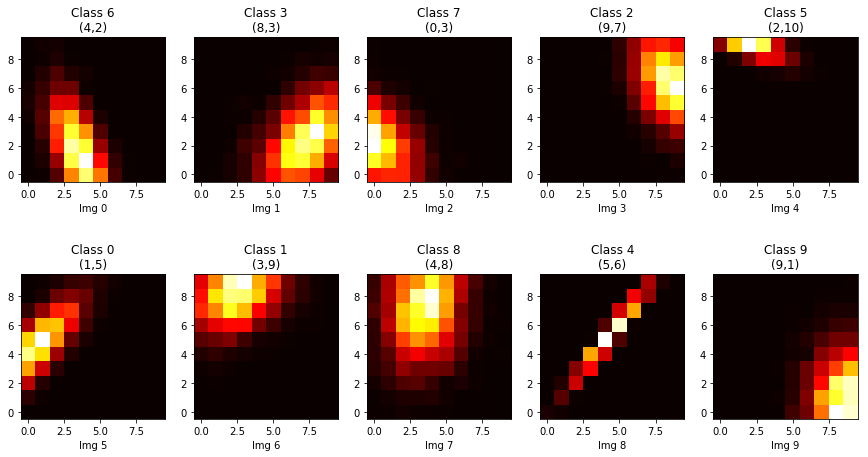

In [11]:
predSetSize = 10
predData = np.zeros((predSetSize, 100))
samples = np.random.permutation(poles.shape[0])[0:predSetSize].tolist()

for i in range(0, len(samples)):
    p = poles[samples[i],0:2]
    sigma = poles[samples[i], 2:6].reshape(2,2) + np.random.uniform(-0.5,0.5,(2,2))
    x,y = np.random.multivariate_normal(p,sigma,points).T
    H = np.histogram2d(x,y,bins=classes, range=[[0,classes],[0,classes]], normed=True)[0].T
    predData[i] = H.reshape(1,100)

results = np.round(model.predict(predData, verbose=1), decimals=2)
resultLabels = np.argmax(results, axis=1)

fig=plt.figure(figsize=(15, 8))
for i in range(0, predSetSize):
    fig.add_subplot(2,5, i+1)
    plt.imshow(np.reshape(predData[i], (10,10)), interpolation='nearest', cmap="hot", origin='low')
    plt.title('Class {}\n({},{})'.format(resultLabels[i], poles[resultLabels[i],0].astype(int), poles[resultLabels[i],1].astype(int)))
    plt.xlabel("Img {}".format(i))



## Conclusions
This example is still abstract (i.e., we used random data), but it shows the general workflow. In the next tutorial, we will apply this to a meaningful dataset.